## ML model comparison

In this notebook we'll compare between the ML models - Ridge and Linear Regression.<br>


In [1]:
import pandas as pd
import scipy as sc
import numpy as np
from urllib import request #for download excel
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#import warnings; warnings.filterwarnings(action='once')
pd.set_option('display.max_columns', None) # spread dataframe columns

In [49]:
## Reading LR model output
##########################

path='./proj_datasets/'
name='Lr models 123.xlsx'
df_123=pd.read_excel(path+name, index_col=0) # read each file in the folder
list(df_123.columns)
df_123.head(5)

,State,Actual Property crime,Predict Property crime,Property crimedeviation,Property crimedeviation in %,Actual Motor vehicle theft,Predict Motor vehicle theft,Motor vehicle theftdeviation,Motor vehicle theftdeviation in %,Actual Aggravated assault,Predict Aggravated assault,Aggravated assaultdeviation,Aggravated assaultdeviation in %
0,ALASKA,0.013210,0.020901,0.007691,0.884225,0.015598,0.015598,0.008528,0.583323,0.042357,0.017518,0.024839,1.226125
1,ARIZONA,0.150297,0.187643,0.037346,4.293690,0.113644,0.113644,0.018249,1.248219,0.211595,0.157011,0.054584,2.694461
2,ARKANSAS,0.066151,0.077048,0.010897,1.252882,0.037993,0.037993,0.008252,0.564430,0.127862,0.060796,0.067066,3.310606
3,CALIFORNIA,0.780920,0.873472,0.092552,10.640843,0.776509,0.776509,0.189081,12.932862,0.952069,0.979359,0.027291,1.347163
4,COLORADO,0.109577,0.145451,0.035873,4.124434,0.128346,0.128346,0.059312,4.056867,0.143903,0.147830,0.003928,0.193886


In [50]:
## Reading LR model output
##########################

path='./proj_datasets/'
name='Ridge model all crime.xlsx'
df_ridge=pd.read_excel(path+name, index_col=0) # read each file in the folder
df_ridge.dropna(inplace = True)
df_ridge.head(5)

,State,Pred Violent crime,Actual Violent crime,deviation Violent crime,deviation Violent crime %,Pred Murder and nonnegligent manslaughter,Actual Murder and nonnegligent manslaughter,deviation Murder and nonnegligent manslaughter,deviation Murder and nonnegligent manslaughter %,Pred Forcible rape,Actual Forcible rape,deviation Forcible rape,deviation Forcible rape %,Pred Robbery,Actual Robbery,deviation Robbery,deviation Robbery %,Pred Aggravated assault,Actual Aggravated assault,deviation Aggravated assault,deviation Aggravated assault %,Pred Property crime,Actual Property crime,deviation Property crime,deviation Property crime %,Pred Burglary,Actual Burglary,deviation Burglary,deviation Burglary %,Pred Larceny-theft,Actual Larceny-theft,deviation Larceny-theft,deviation Larceny-theft %,Pred Motor vehicle theft,Actual Motor vehicle theft,deviation Motor vehicle theft,deviation Motor vehicle theft %,Pred Arson1,Actual Arson1,deviation Arson1,deviation Arson1 %,Sum pred
1,ALASKA,0.037,0.015,0.022,0.499,0.030,0.035,0.005,0.079,0.068,0.033,0.034,0.554,0.019,0.066,0.047,0.910,0.043,0.016,0.027,0.502,0.027,0.042,0.015,0.300,0.015,0.021,0.006,0.153,0.027,0.011,0.017,0.368,0.029,0.023,0.007,0.166,0.010,0.016,0.006,0.209,0.306
2,ARIZONA,0.198,0.203,0.005,0.113,0.195,0.188,0.008,0.120,0.249,0.196,0.053,0.852,0.118,0.249,0.131,2.563,0.239,0.129,0.110,2.075,0.210,0.212,0.002,0.039,0.090,0.188,0.098,2.440,0.220,0.125,0.094,2.105,0.119,0.200,0.081,2.032,0.135,0.114,0.021,0.768,1.772
3,ARKANSAS,0.084,0.062,0.023,0.513,0.094,0.094,0.000,0.006,0.110,0.132,0.022,0.359,0.037,0.129,0.092,1.806,0.113,0.029,0.084,1.574,0.077,0.128,0.051,1.009,0.068,0.077,0.009,0.220,0.089,0.063,0.026,0.573,0.033,0.084,0.050,1.258,0.047,0.038,0.009,0.324,0.752
4,CALIFORNIA,0.940,0.973,0.033,0.742,0.680,0.934,0.255,4.052,1.023,0.811,0.212,3.400,0.872,0.929,0.057,1.110,0.954,0.883,0.071,1.328,0.806,0.952,0.146,2.905,0.558,0.873,0.315,7.833,0.816,0.587,0.229,5.114,0.606,0.867,0.262,6.528,1.026,0.777,0.249,9.079,8.281
5,COLORADO,0.127,0.134,0.007,0.162,0.119,0.121,0.003,0.040,0.265,0.117,0.149,2.385,0.070,0.241,0.171,3.348,0.140,0.065,0.075,1.406,0.148,0.144,0.005,0.091,0.093,0.145,0.053,1.308,0.150,0.080,0.070,1.552,0.123,0.150,0.028,0.691,0.106,0.128,0.022,0.804,1.341


In [43]:
# Getting one state for comparing from LR tabel

lr_wis = df_123[df_123['State'] == 'SOUTH DAKOTA']
lr_wis
lr_wis_list= lr_wis.loc[:,[
                'Actual Property crime'
                ,'Predict Property crime'
                ,'Actual Motor vehicle theft'
                ,'Predict Motor vehicle theft'
                ,'Actual Aggravated assault'
                ,'Predict Aggravated assault']].values.flatten()
lr_wis_list

array([0.01175317, 0.01413095, 0.00929505, 0.00929505, 0.02002017,
       0.01663836])

In [44]:
# Getting one state for comparing from Ridge tabel

ridge_wis = df_ridge[df_ridge['State'] == 'SOUTH DAKOTA']
ridge_wis_list = ridge_wis.loc[:,['Pred Property crime'
                                  ,'Pred Motor vehicle theft'
                                  ,'Pred Aggravated assault']].values.flatten()
ridge_wis_list

array([0.014, 0.007, 0.016])

The following Bar Chart describes the the comparison between the two models.

This Chart is divided to 3 sections.<br>
1) Property Crime - Actual number, Predction on LR , Prediction Ridge
2) Motor vehicle theft - Actual number, Predction on LR , Prediction Ridge
3) Aggravated assault - Actual number, Predction on LR , Prediction Ridge

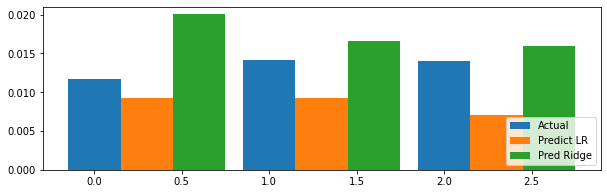

In [48]:
## Plotting the Bar Graph which we compare between the 2 models.

data1 = [lr_wis_list[0],lr_wis_list[1] ,ridge_wis_list[0] ] 
data2 = [lr_wis_list[2],lr_wis_list[3] ,ridge_wis_list[1] ]
data3 = [lr_wis_list[4],lr_wis_list[5] ,ridge_wis_list[2] ]

leg = ['Actual','Predict LR','Pred Ridge']

plt.figure(figsize=(10, 3))

width =0.3

plt.bar(np.arange(len(data1)), data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width )
plt.bar(np.arange(len(data3))+ width*2, data3, width=width)

plt.legend(leg,loc = 4)